<h1>SC1015 Mini Project</h1>

<h2>Part 1: Data Exploration & EDA</h2>

In this preliminary stage, we will first briefly explore the dataset through summary statistics. Through a visual exploration of the dataset, we then dive further into the characteristics of the individual features and their relationship with the response variable `target`, which may not only help us answer our problem statement but also provide some insight into how to prepare the data for the machine learning models later on.

<h3>Import Libraries</h3>

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
sb.set()

<h3>Import Dataset</h3>

In [2]:
# Read in dataset
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


<h3>Preliminary Exploration</h3>

In [3]:
# shape of dataset
print('Data type: ', type(df))
print('Data dims: ', df.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (1025, 14)


In [4]:
# data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


By performing some quick observations on the dataset, we were able to deduce the following:
* There are `14` features and `1025` observations in the dataset.
* The response variable seems to be `target`, while the remaining 13 features are most likely predictors.
* There is only `1` feature identified as `float64` by default, while the rest are `int64`. They all appear to be `Numeric` variables.
* At first glance, no features contain null or N/A observations. However, more data exploration will have to be performed to confirm this.

The description of the dataset, as provided by the UCI Machine Learning Repository and Kaggle, is as follows:

> 1. `age`: age in years
> 2. `sex`: sex
    * 0: female
    * 1: male
> 3. `cp`: chest pain type
    * 0: asymptomatic
    * 1: typical angina
    * 2: atypical angina
    * 3: non-anginal pain
> 4. `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
> 5. `chol`: serum cholestoral in mg/dl
> 6. `fbs`: (fasting blood sugar > 120 mg/dl)
    * 1: true
    * 0: false
> 7. `restecg`: resting electrocardiographic results
    * 0: normal
    * 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
> 8. `thalach`: maximum heart rate achieved
> 9. `exang`: exercise induced angina
    * 1: yes
    * 0: no
> 10. `oldpeak`: ST depression induced by exercise relative to rest
> 11. `slope`: the slope of the peak exercise ST segment
    * 0: downsloping
    * 1: flat
    * 2: upsloping
> 12. `ca`: number of major vessels (0-3) colored by flourosopy
> 13. `thal`: the presence of a blood disorder thalassemia 
    * 1: fixed defect (no blood flow in some parts of the heart)
    * 2: normal blood flow
    * 3: reversable defect (blood flow observed but it is not normal)
> 14. `target`: diagnosis of heart disease (angiographic disease status)
    * 0: < 50% diameter narrowing
    * 1: > 50% diameter narrowing

From this description and our observations on the dataset, we can then deduce the following about the features:
* The predictors `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal` and the response variable `target` are <b>nominal categorical variables</b>, where categories are represented by numeric indicators. They will be treated as if they were categorical variables.
* The predictors `age`, `trestbps`, `chol`, `thalach` and `oldpeak` are <b>continuous numeric variables</b>, measured over a range of values.

In [5]:
# separate continuous from categorical into two lists
cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
cont = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [6]:
df[cont].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


In [7]:
pd.DataFrame(df[cat].astype('object').describe())

,sex,cp,fbs,restecg,exang,slope,ca,thal
count,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,5,4
top,1,0,0,1,0,1,0,2
freq,713,497,872,513,680,482,578,544


In [8]:
pd.DataFrame(df['target'].astype('object').describe())

,target
count,1025
unique,2
top,1
freq,526


<u>Are there any outliers in the data?</u>

We will use the <b>1.5IQR</b> rule to designate outliers as data points that lie beyond <b>Q3 + (1.5 * IQR)</b> [1.5IQR above 75th percentile] and below <b>Q1 + (1.5 * IQR)</b> [1.5IQR below 25th percentile] for the continuous variables.

We notice that there are outliers in our data. For example, the max values for `trestbps`, `chol`, and `oldpeak` lie beyond the Q3 + (1.5 * IQR) range, and the min value for `thalach` is well below the Q1 + (1.5 * IQR) range. 

However, these outliers can be construed to be abnormal values that are indicators of heart disease. For example, a cholesterol level above 240 mg/dL is in the unhealthy range, and the max value for `chol`, which is 564 mg/dL, isn't exactly unheard of. And in fact, the lowest heart rate recorded was 27 bpm, so the min value for `thalach`, which is 71 bpm, appears to be a valid observation. Therefore, we will keep these outliers by default as they are completely valid observations from a medical perspective.

<h2>Exploratory Data Analysis</h2>

For our exploratory data analysis, we will create a temporary dataframe with more intuitive labels for the categorical variables to help facilitate our analyses.

In [9]:
# use a dictionary to map numeric values to actual definition, for each categorical variable
dict1 = {'sex': {0: 'Female', 1: 'Male'}, 
        'cp': {0: 'Asymptomatic', 1: 'Typical', 2: 'Atypical', 3: 'Non-Anginal'}, 
        'fbs': {0: 'False', 1: 'True'}, 
        'restecg': {0: 'Normal', 1: 'ST-T Wave Abnormality', 2: 'Probable/Definite LVH'},
        'exang': {0: 'No', 1: 'Yes'},
        'slope': {2: 'Upsloping', 1: 'Flat', 0: 'Downsloping'}, 
        'ca': {0: 0, 1: 1, 2: 2, 3: 3},
        'thal': {1: 'Normal', 2: 'Fixed', 3: 'Reversible'},
        'target': {0: 'No', 1: 'Yes'}}

# create temporary dataframe for EDA
df_new = df.copy()
for i in dict1:
    df_new = df_new.replace({i: dict1[i]})

In [10]:
df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,Asymptomatic,125,212,False,ST-T Wave Abnormality,168,No,1.0,Upsloping,2,Reversible,No
1,53,Male,Asymptomatic,140,203,True,Normal,155,Yes,3.1,Downsloping,0,Reversible,No
2,70,Male,Asymptomatic,145,174,False,ST-T Wave Abnormality,125,Yes,2.6,Downsloping,0,Reversible,No
3,61,Male,Asymptomatic,148,203,False,ST-T Wave Abnormality,161,No,0.0,Upsloping,1,Reversible,No
4,62,Female,Asymptomatic,138,294,True,ST-T Wave Abnormality,106,No,1.9,Flat,3,Fixed,No


We will also use the `cont` and `cat` lists created before to analyze our continuous and categorical variables separately.

<h3>Univariate Analysis</h3>

<h4>Target Variable</h4>

Univariate analysis on the response variable `target`.

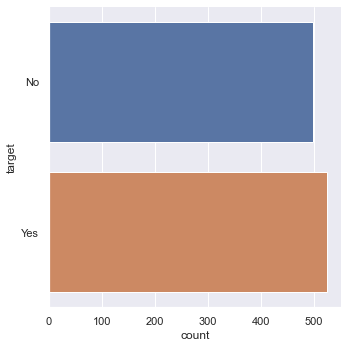

In [11]:
sb.catplot(data = df_new, y='target', kind='count')

In [12]:
countHD, countNHD = df_new['target'].value_counts()
print('% with Heart Disease: {:.0%}'.format(countHD/(countHD+countNHD)))
print('% without Heart Disease: {:.0%}'.format(countNHD/(countHD+countNHD)))

% with Heart Disease: 51%
% without Heart Disease: 49%


<u>Is there a need to resample the data to balance the classes such that predictive modelling is less biased towards a particular class?</u>

Data resampling is performed to resolve an imbalance of classes in the response variable, which can cause bias in the predicted results. For our response variable `target`, the classes of "Yes" and "No" to indicate heart disease are actually extremely well-balanced, with virtually no difference in the number of samples between both classes at all. Therefore, there is no need to resample the data.

<h4>Continuous Variables</h4>

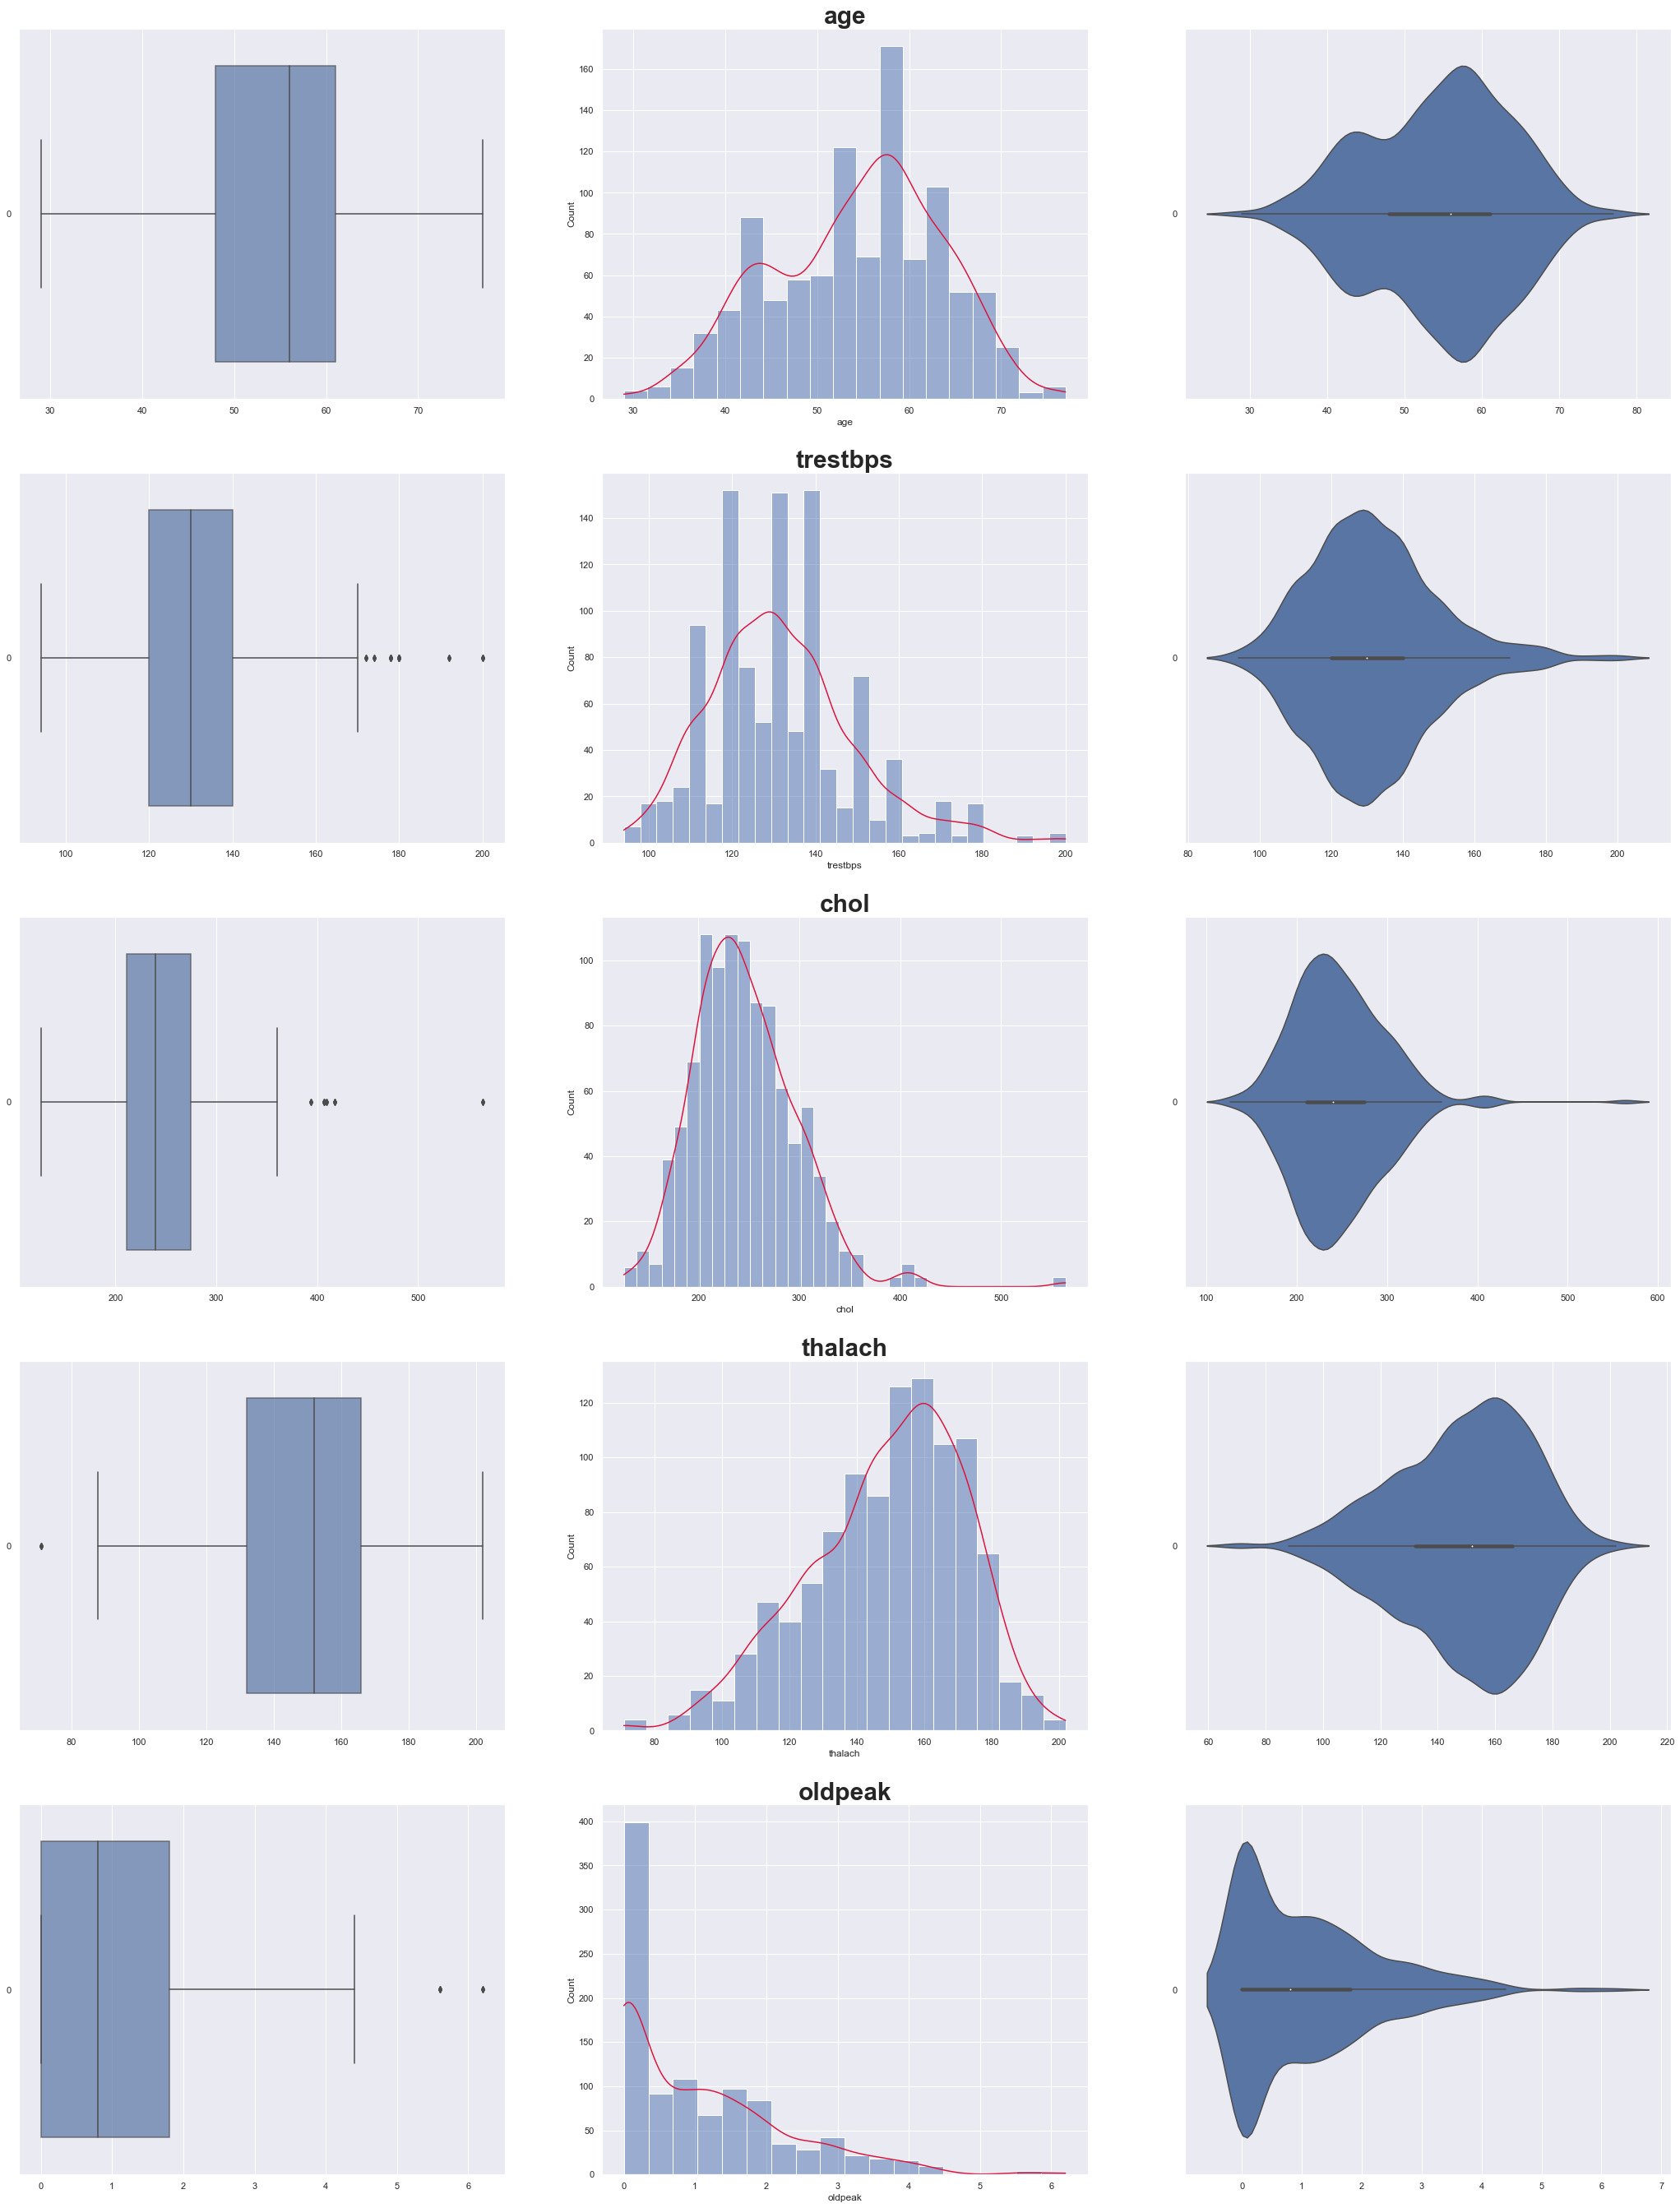

In [13]:
f, axes = plt.subplots(5, 3, figsize=(36, 48))

count = 0
for feature in cont:
    sb.boxplot(data = df_new[feature], orient='h', ax=axes[count,0], boxprops=dict(alpha=.7))
    g = sb.histplot(data=df_new[feature], ax=axes[count,1], kde=True)
    g.set_title(feature, fontdict={'fontsize':30, 'fontweight':'bold'})
    g.lines[0].set_color('crimson')
    sb.violinplot(data=df_new[feature], orient='h', ax=axes[count,2])
    count+=1

<u>What can be observed?</u>

Just from observation of the violin plots alone, we can tell that `trestbps`, `oldpeak` and `chol` are positively-skewed, while `thalach` and `age` are negatively-skewed. This can be confirmed by the skewness values.

In [14]:
print("Skewness:")
df_new[cont].skew(axis=0)

Skewness:


age        -0.248866
trestbps    0.739768
chol        1.074073
thalach    -0.513777
oldpeak     1.210899
dtype: float64

The rule of thumb for skewness levels is as follows:
- If the skewness is between -0.5 and +0.5, the data is fairly symmetrical.
- If the skewness is between -1 to -0.5 or +0.5 to +1, then the data is moderately skewed.
- Any skewness value beyond this range is considered highly skewed.

According to this rule of thumb, we see that `chol` and `oldpeak` are highly skewed, and `trestbps` is moderately-skewed. As such, we will consider normalizing the data to fit a normal distribution during the data preprocessing stage later.

<h4>Categorical Variables</h4>

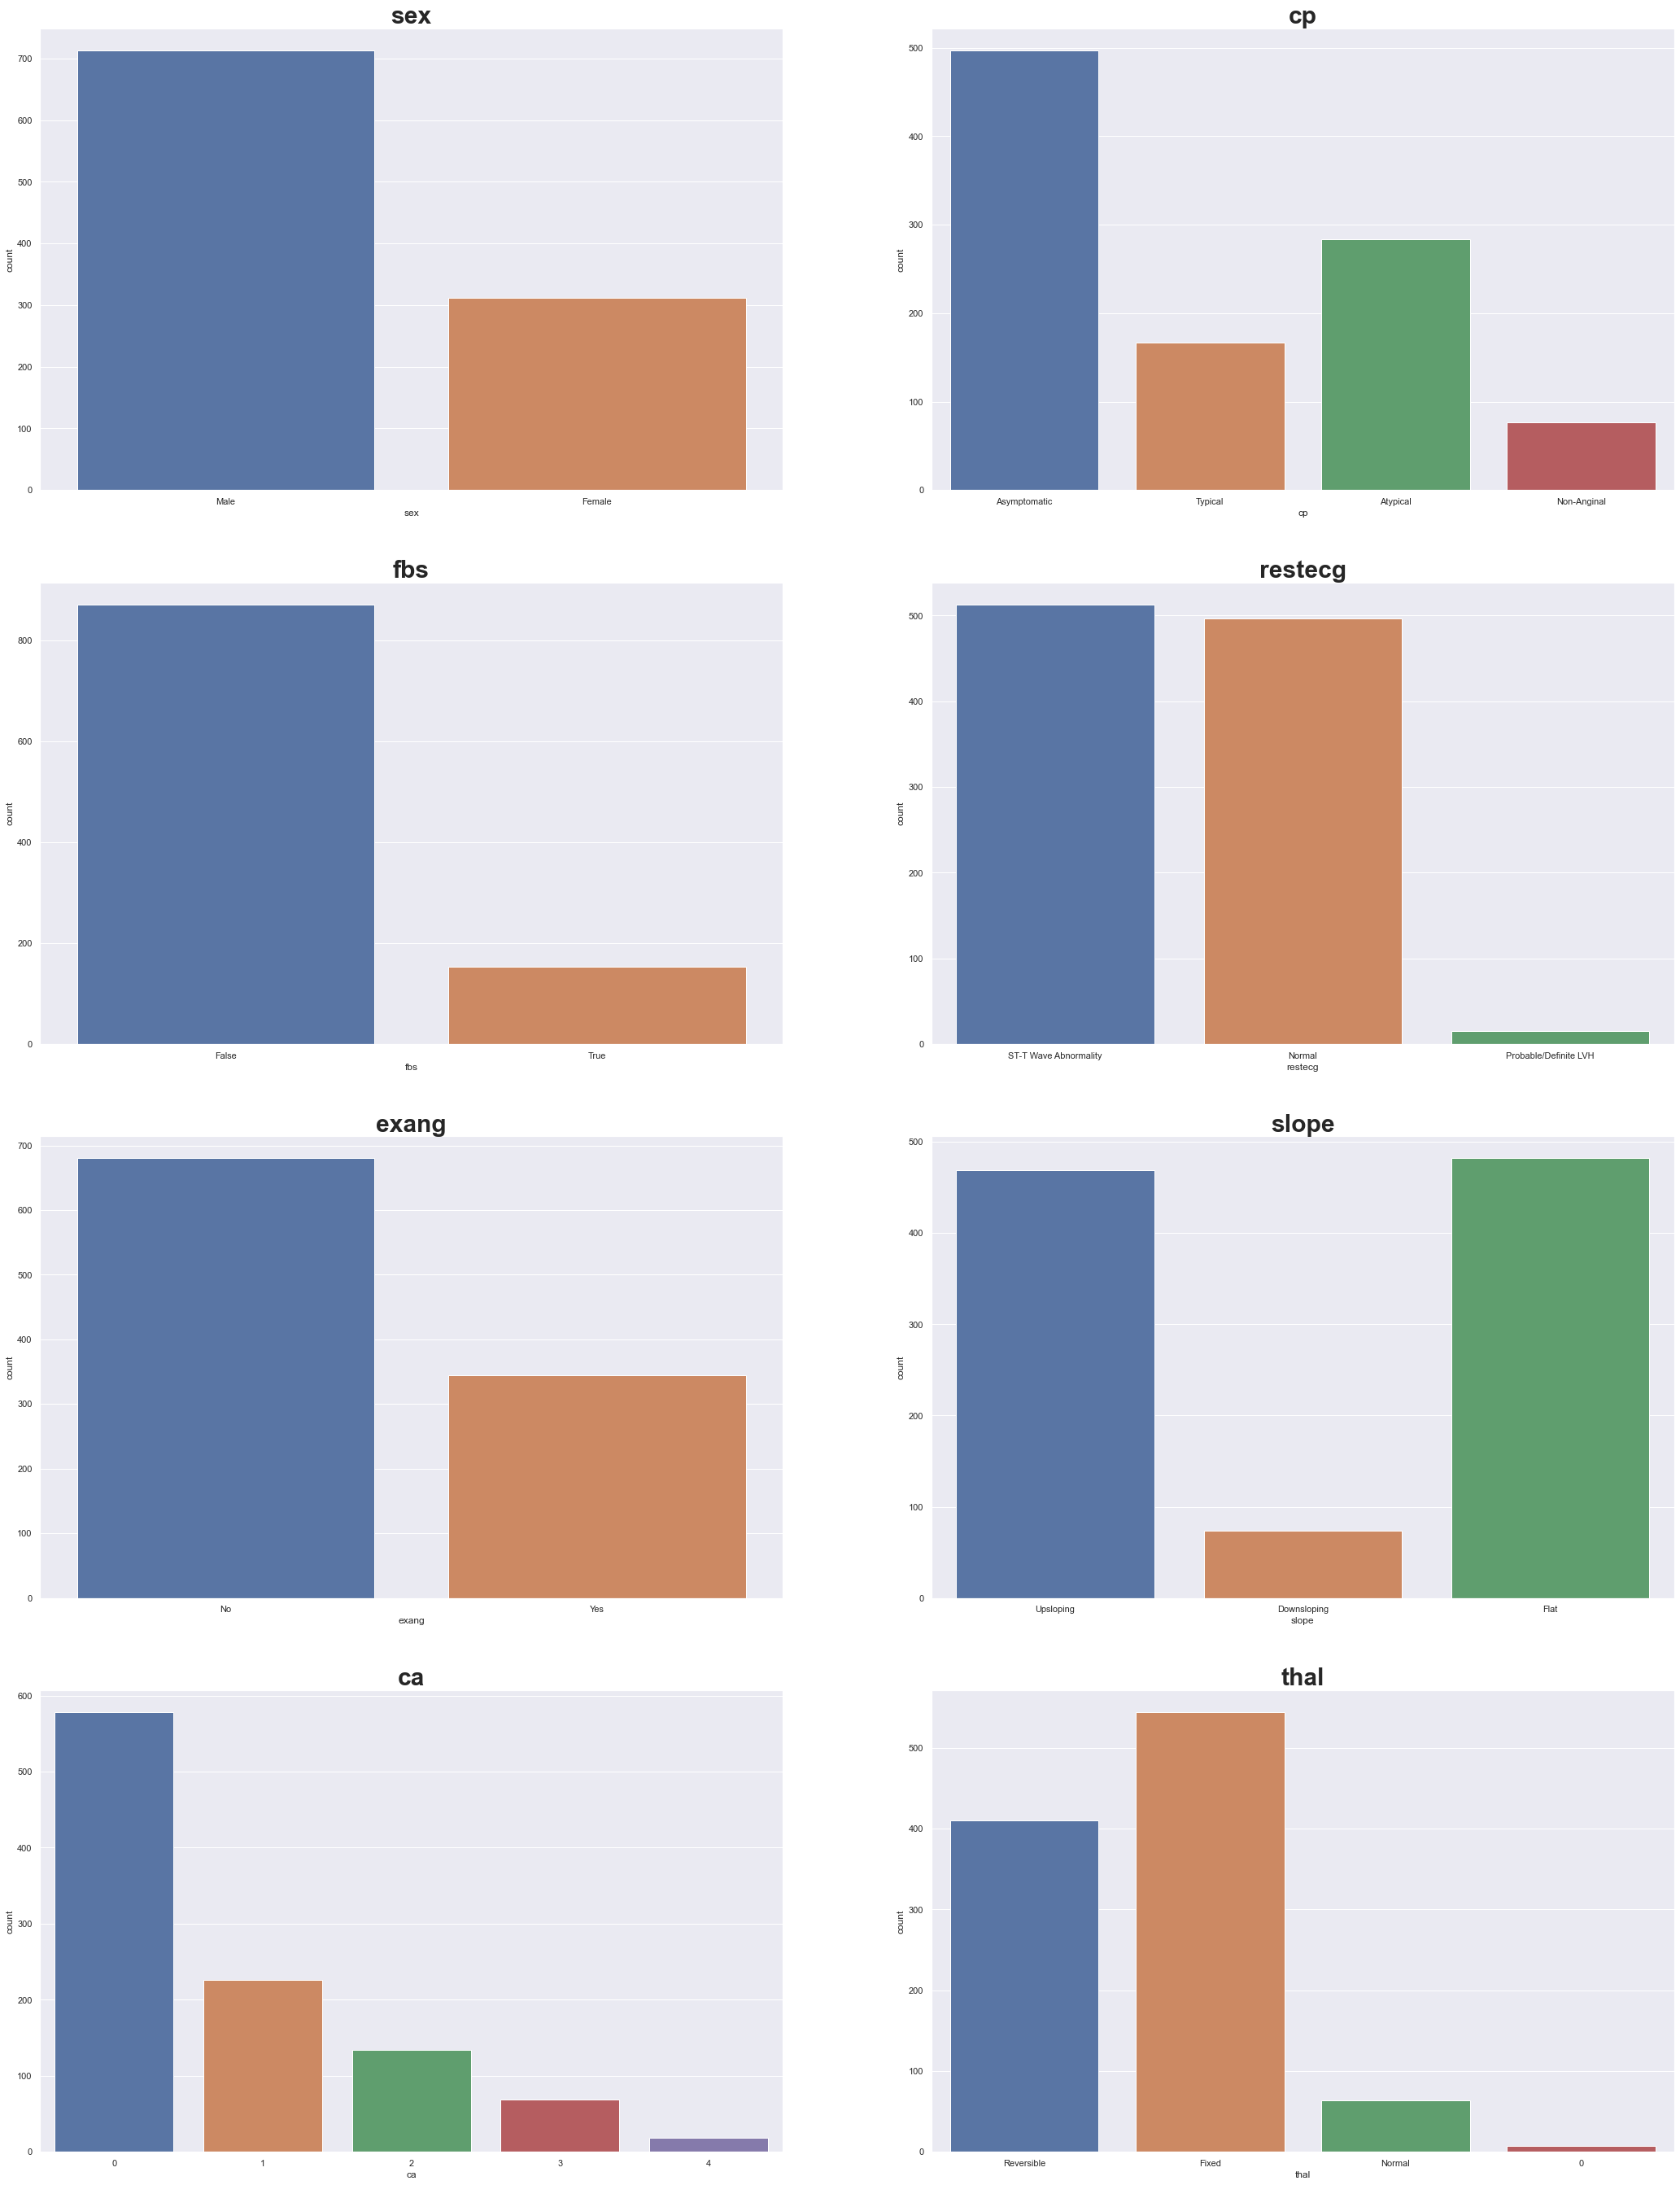

In [15]:
f, axes = plt.subplots(4, 2, figsize=(36, 48))

h = v = 0
for feature in cat:
    if feature == 'target': break;
    if h == 2: 
        h = 0 
        v += 1
    g = sb.countplot(data=df_new, x=feature, ax=axes[v,h])
    g.set_title(feature, fontdict={'fontsize':30, 'fontweight':'bold'})
    h+=1

By observing the distribution of each categorical variable from the plots, we see that there are unknown classes `thal = 0` and `ca = 4` not defined in the data_description.txt file. This will be dealt with in the data preprocessing stage.

<h3>Bivariate / Multivariate Analysis</h3>

Now we will explore the relationships between the predictors and the response variable. In addition, we will check for correlative properties between predictors.

<h4>Distribution of Continuous Variables against Response</h4>

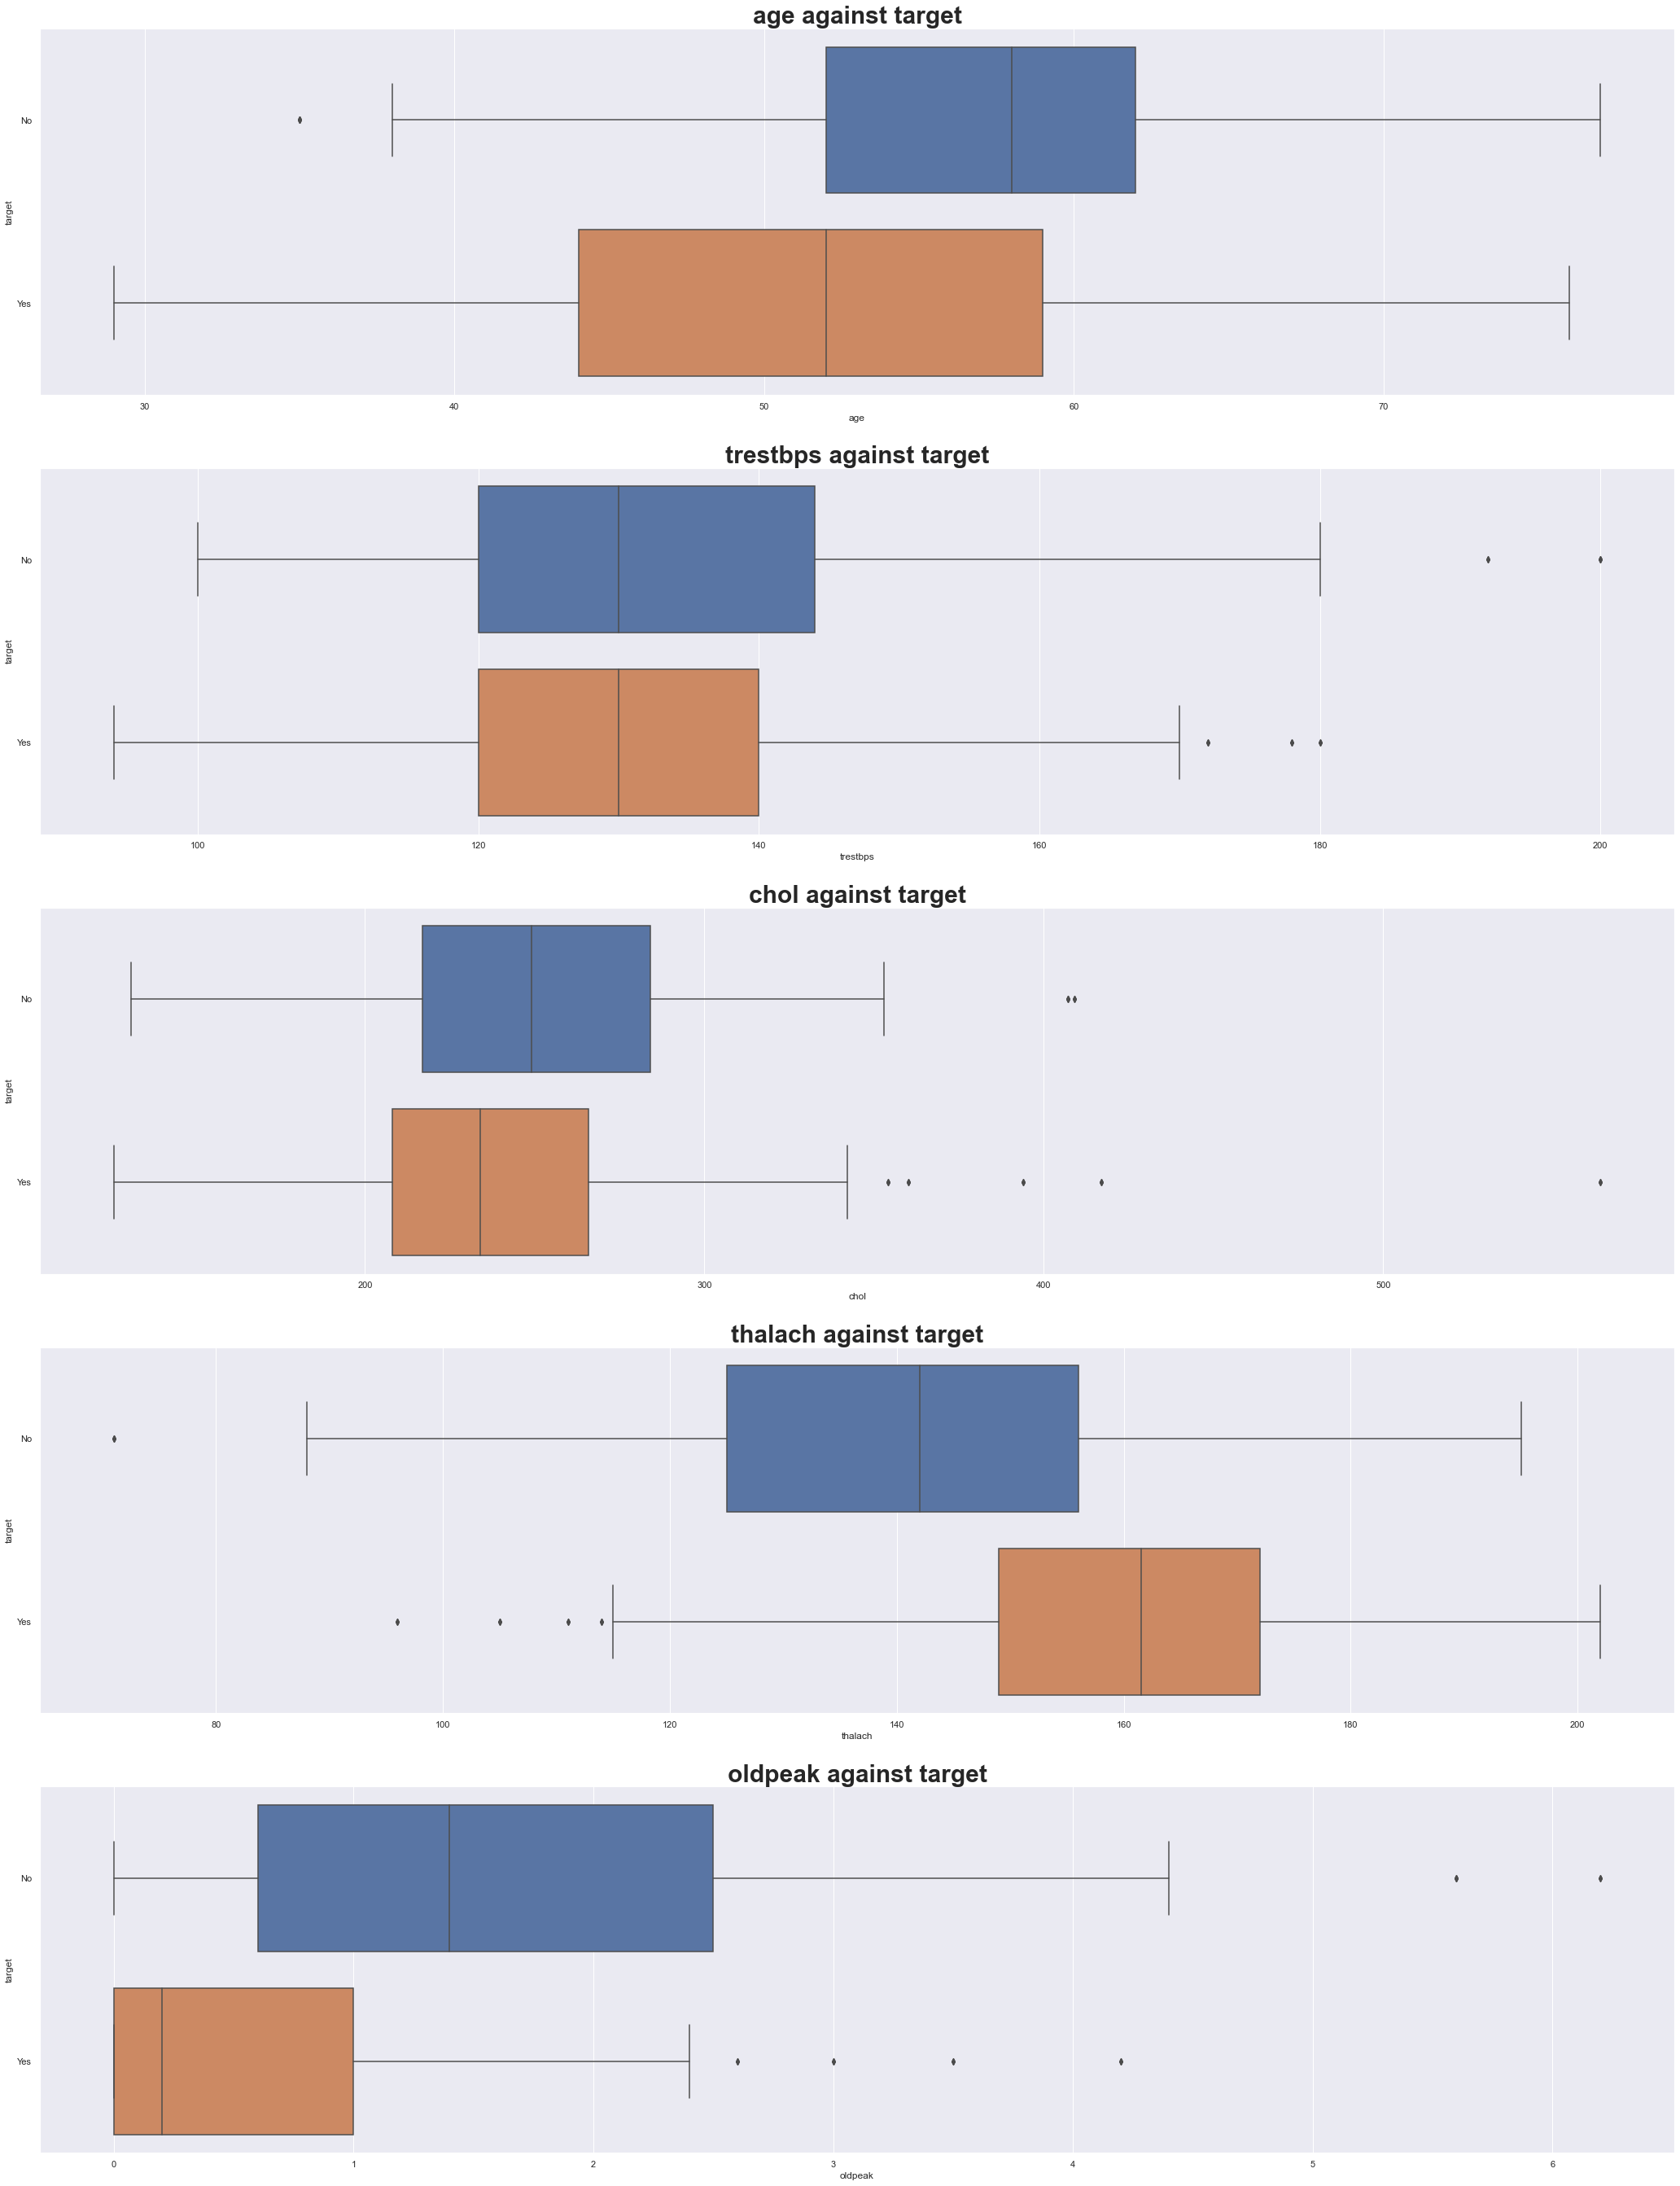

In [16]:
f, axes = plt.subplots(len(cont), 1, figsize=(36,48))

count = 0
for feature in cont:
    g1 = sb.boxplot(data=df_new, x=feature, y='target', orient='h', ax=axes[count])
    title = feature + ' against target'
    g1.set_title(title, fontdict={'fontsize':30, 'fontweight':'bold'})
    count += 1

<u>What do the data distributions tell us?</u>

For each predictor against `target`, how distinct the data distributions are for each class "Yes" and "No" will give us a rough idea of the predictive quality of the predictor. This can be determined by observing how far apart the <b>median</b> is for both distributions.

For instance, for `thalach`, it can be observed that the median for `target = Yes` lies outside of the box containing 50% of the distribution for `target = No`. This implies that there is a difference between both distributions such that distinct partitions can be made to segregate the data between patients with heart disease and patients without. Therefore, `thalach` may help the predictive model in making better predictions on the data. 

The same goes for `age` and `oldpeak`.

On the other hand, the median of both distributions under `chol` are only minimally distinct, implying that `chol` is not a good predictor for helping the predictive model in making predictons on the data between both classes `target = Yes` and `target = No`. In fact, `trestbps` is even worse in this regard, as the median of both distributions are virtually equal to each other.

<br>

Now, we will make further observations of the distributions between each predictor and the response variable `target`.

First, let's take a look at the `age` group distribution for `target = Yes` and `target = No`.

In [17]:
# create new categorical variable 'age group'
df_temp = df_new.copy()
df_temp['age'] = pd.cut(x=df_temp['age'], bins=[0,19,29,39,49,59,69,79,89,99], 
                        labels=["≤19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"])

<AxesSubplot:xlabel='age', ylabel='count'>

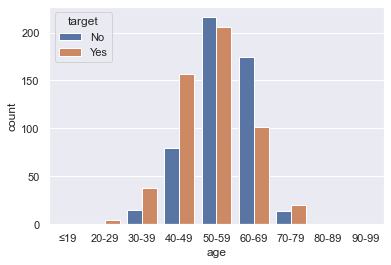

In [18]:
sb.countplot(data=df_temp, x='age', hue='target')

We see that there are more recorded instances of people with heart disease over people without heart disease in the age groups of `30-39` and `40-49`, and on a lesser scale, for the age group of `70-79`. This may be an indicator that people in these age groups are more susceptible to heart disease than people in other groups.

Meanwhile, the opposite is true for the age group `60-69`, while the age group of `50-59` is more or less balanced.

<br>

<h4>Categorical Variables against Response</h4>

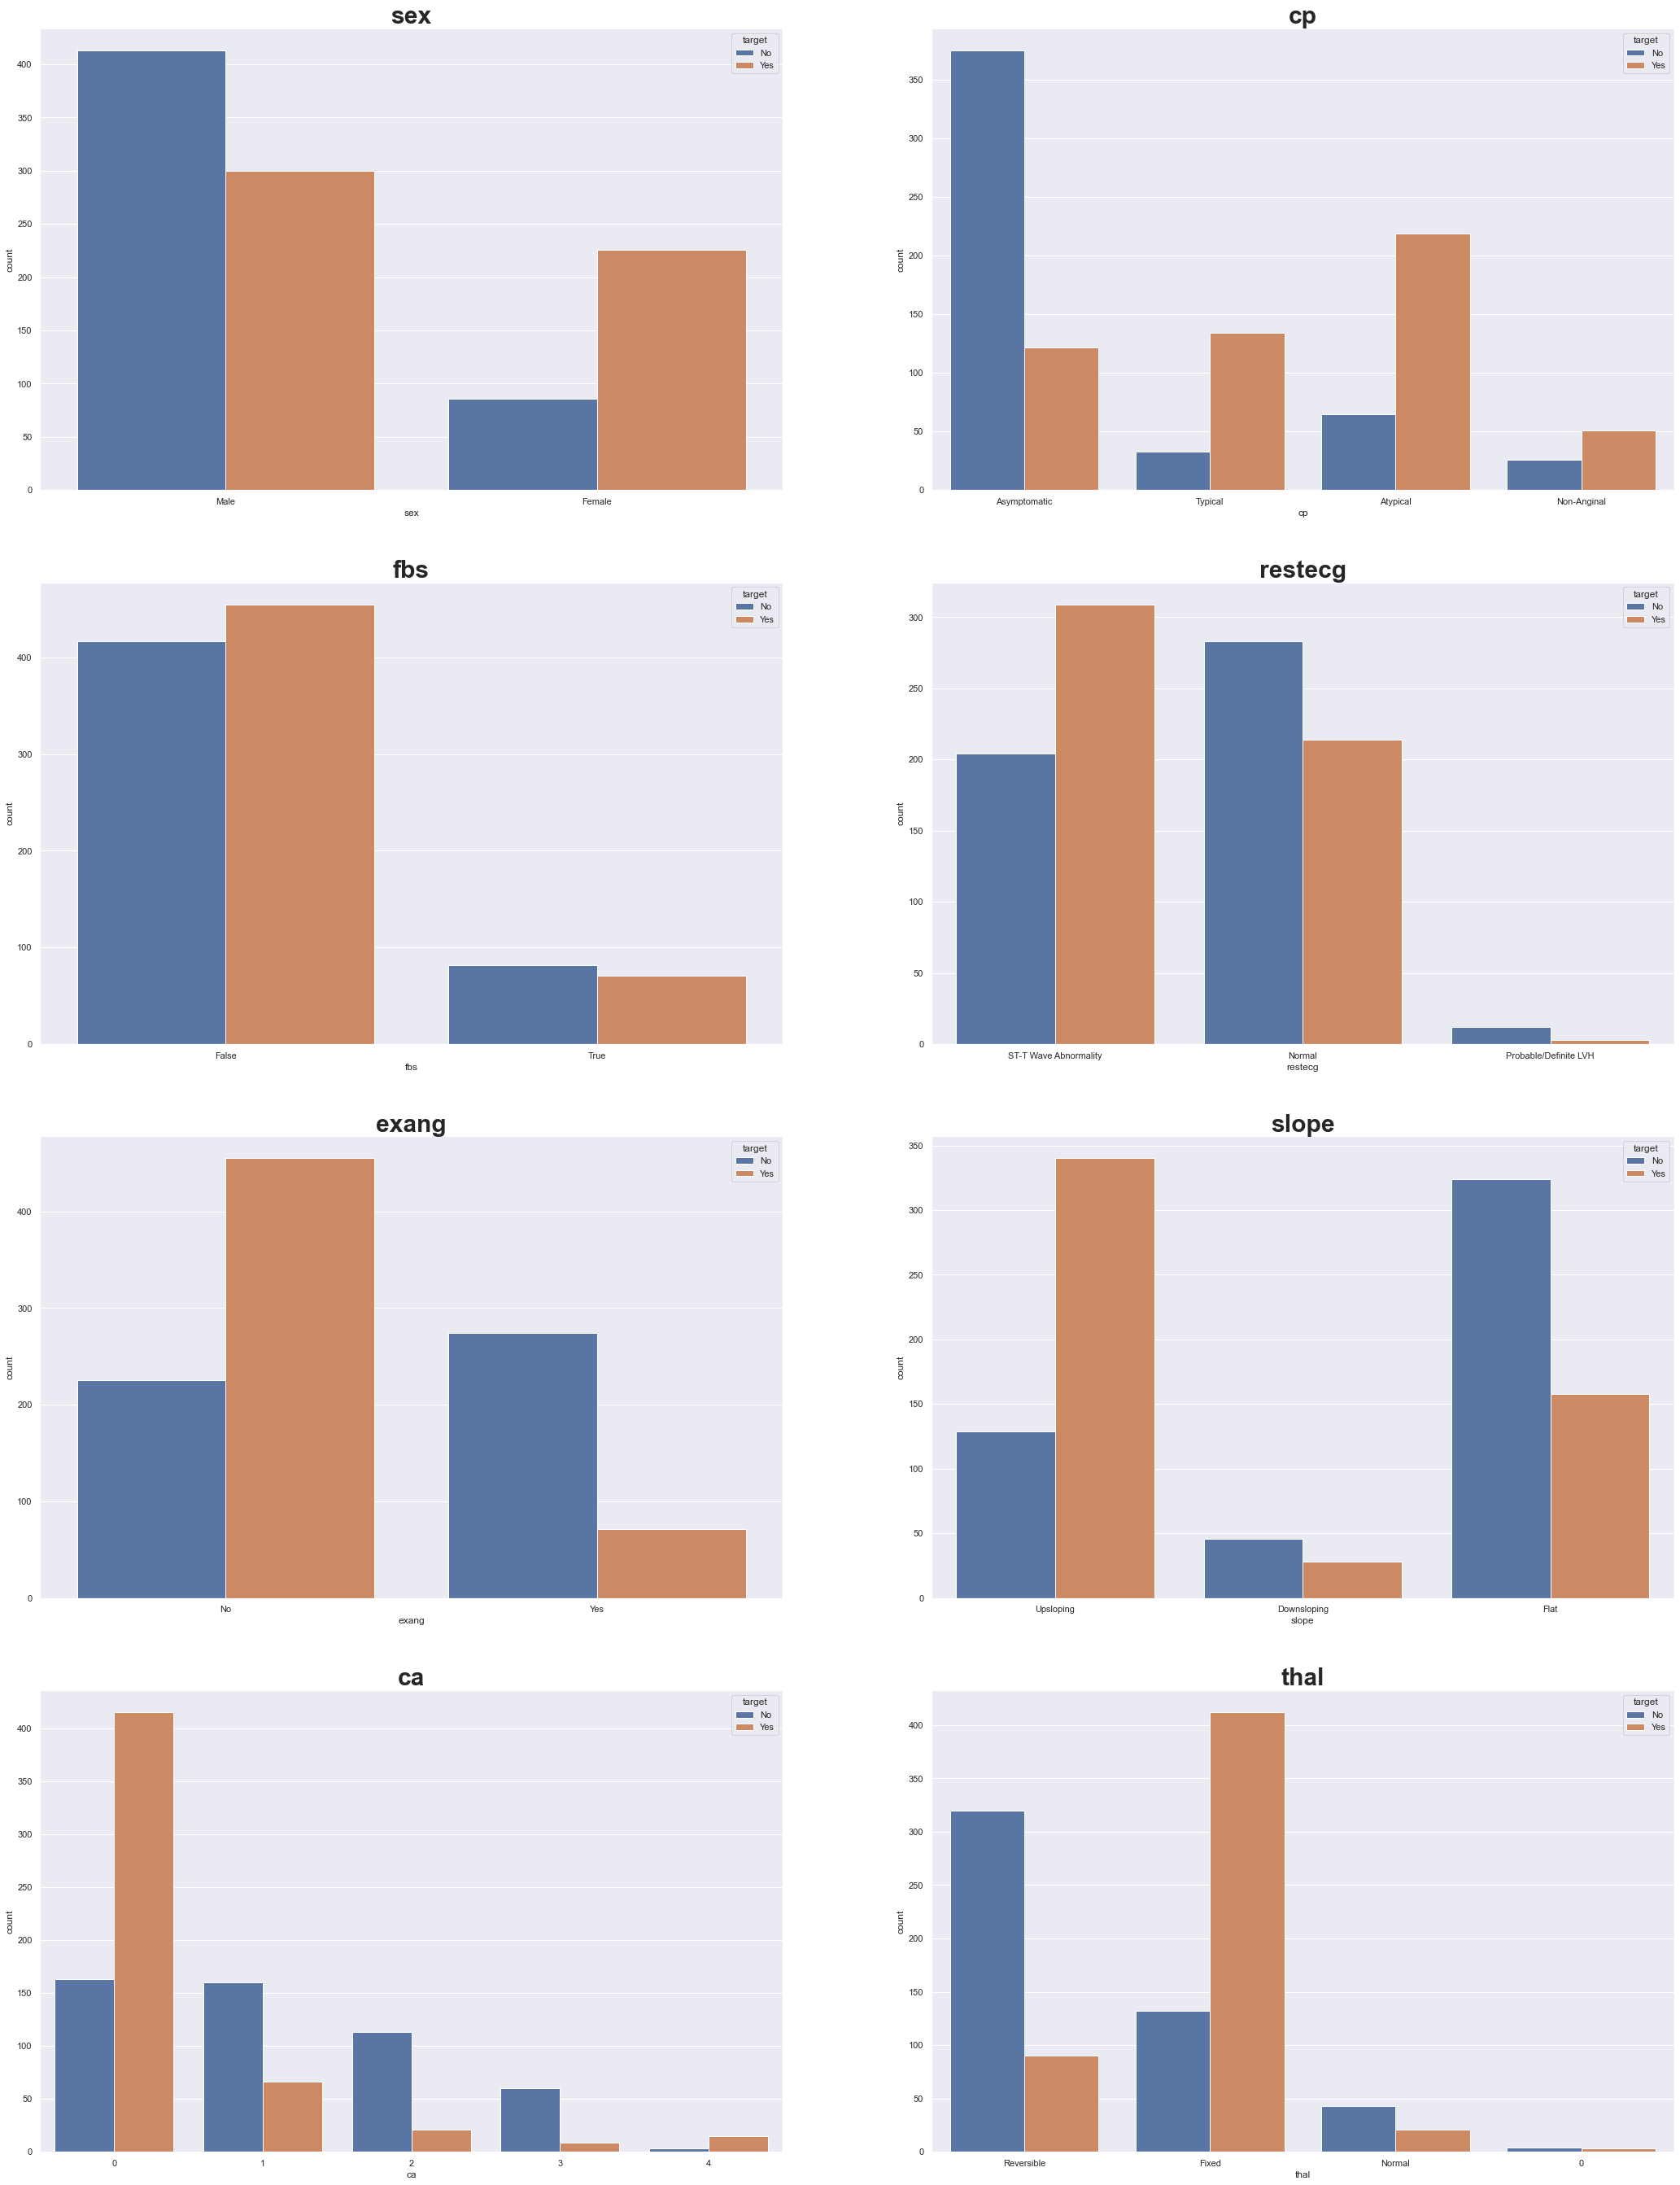

In [19]:
f, axes = plt.subplots(4, 2, figsize=(36, 48))

h = v = 0
for feature in cat:
    if feature == 'target': break;
    if h == 2: 
        h = 0 
        v += 1
    g = sb.countplot(data=df_new, x=feature, hue='target', ax=axes[v,h])
    g.set_title(feature, fontdict={'fontsize':30, 'fontweight':'bold'})
    h+=1

The following observations for the relationship between each variable and `target` can be made:
* For `sex`, it appears that Female patients are less susceptible to heart disease than Males, judging from the class distribution.
* For `cp`, it appears that asymptomatic patients are significantly less susceptible to heart disease, as expected. Additionally, those with typical and atypical chest pain of the anginal type, which refers to chest pain caused by insufficient blood flow to the heart, are more susceptible to heart disease than those of the non-anginal type, which is also expected.
* Not much insights can be derived from the `fbs` bar plot, as the classes are largely balanced. Just like `chol`, this may be an indication that this specific variable may not contribute much to the predictive model as a distinction between the classes of the response variable `target` can not be made easily with `fbs`.
* For `restecg`, the distinction between `target = 0` and `target = 1` for each of its classes are only slightly more prominent as compared to `fbs`.
* For `exang`, which refers to exercise-induced anginal pain, it appears that patients without exercise-induced anginal pain are more likely to have heart disease than those who experience anginal pain while performing exercise. This is an indication of <b>unstable angina</b>, which refers to heart pain even during rest, and is a common indication of heart-related problems.
* According to the National Library of Medicine, the treadmill ECG stress test is commonly used to screen for heart-related problems, often evaluated by changes to the ST segment, which is recorded `slope`. If there are changes to the peak ST segment (upsloping/downsloping) during exercise, then it is an indication of heart-related issues. The data clearly makes this distinction: patient who have an upsloping peak ST segment typically are those with heart disease, while those who have a flat peak ST segment are typically those without. This makes `slope` another good predictor for helping us predict heart disease.
* `ca` refers to the number of major vessels colored during fluoroscopy, which is an imaging procedure for observing blood flow and blockages in the major vessels. Vessels not colored are likely blocked vessels, indicating a lack of blood flow and therefore are an indication of heart-related problems. From the plot, there is an overwhelming no. of patients with zero vessels colored that have heart disease. On the other hand, the ratio for patients with any number of vessels colored leans towards no heart disease. Both of these observations follow from the medical perspective and therefore `ca` may be a strong predictor for helping us predict heart disease.
* `thal` refers to the presence of thalassemia, which is a blood disorder that leads to less healthy red blood cells = reduced blood flow = increased risk of heart-related issues. For patients without this disorder (`thal = normal`) and those with thalassemia but have normal blood flow (`thal = reversible`), a strong distinction can be made that leans towards patients without heart disease, which lines up with medical knowledge. On the contrary, patients with fixed thalassemia (`thal = fixed`), who experience reduced blood flow, are distinctly more susceptible to heart disease according to the bar plot. A class separation between those with heart disease and those without can thereby be made confidently using `thal`.

From these observations, we see that all of the categorical variables, less `restecg` and `fbs`, appear to be highly relevant for predicting the presence of heart disease.

<h4>Correlation Matrix</h4>

As the final step for our exploratory data analysis, we will plot several correlation matrices that will help us explore the correlation between the response variable `target` and its predictors. The goal is to identify which features are more relevant to `target`, which will help us when performing the feature selection phase for tuning our predictive model in the later stages.

First, we want to find the correlation between the continuous variables and the response variable `target`.

We will use <b>point biserial correlation</b>, which calculates the relationship between a binary variable and a continuous variable. In this case, the binary variable is our response variable `target`, and the continuous variables are our continuous predictors.

For point biserial correlation, it can take on values between -1 and 1, where:
- -1 indicates perfect negative correlation
- 0 indicates no correlation
- 1 indicates perfect positive correlation

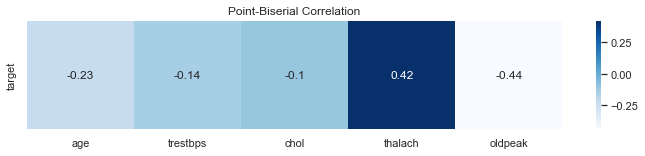

In [20]:
from scipy.stats import pointbiserialr as pbs

pbs_results = []

# Point biserial correlation
for feature in cont:
    pbs_results.append(pbs(df[feature], df['target'])[0])

# Plot heatmap
fig = plt.figure(figsize=(12,2))
sb.heatmap([pbs_results], annot=True, cmap='Blues', 
           xticklabels=cont, yticklabels=['target'])
plt.title("Point-Biserial Correlation")
plt.show()

From the heatmap, the following observations can be made:
- `thalach` is moderately positively-correlated with `target` with correlation = 0.42
- `oldpeak` is moderately negatively-correlated with `target` with correlation = -0.44
- the other variables are only mildy correlated with `target`

From this, an inference can be made: `thalach` and `oldpeak` may be useful in increasing the predictive model's accuracy in classifying between patients with or without heart disease.

<br>

Next, we would like to find the correlation between our categorical variables and the response variable `target`. For this, we will use a <b>chi-square test</b> which finds the correlation between two categorical variables.

When performing the Chi-Square test, we have to consider two hypotheses in order to evaluate the p-square value obtained from the test:
1. H0 (p-square > 0.05): the variables compared are independent of each other.
2. H1 (p-square <= 0.05): the variables are dependent.

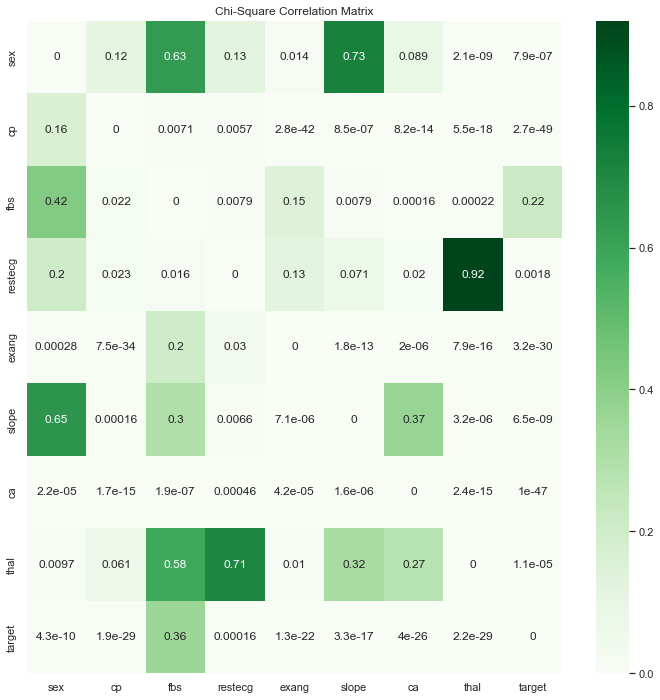

In [21]:
from sklearn.feature_selection import chi2

newcat = cat + ['target']

chi2_results = pd.DataFrame(data = [(0 for i in range(len(df[newcat].columns))) for i in range(len(df[newcat].columns))],
                            columns = newcat)
chi2_results.set_index(pd.Index(newcat), inplace = True)

# perform Chi-Square test
for i in newcat:
    for j in newcat:
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            chi2_results.loc[i, j] = p_val

# plotting heatmap with Chi-Square test results
fig = plt.figure(figsize=(12,12))
sb.heatmap(chi2_results, annot=True, cmap='Greens')
plt.title("Chi-Square Correlation Matrix")
plt.show()

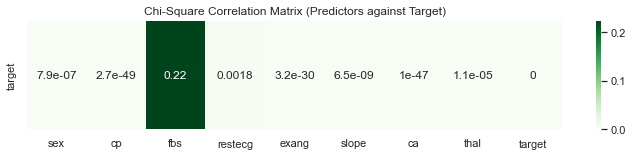

In [22]:
# plotting heatmap with Chi-Square test results (against "target" only)
chi2r_target = chi2_results['target']
fig = plt.figure(figsize=(12,2))
sb.heatmap([chi2r_target], annot=True, cmap='Greens', 
           xticklabels=newcat, yticklabels=['target'])
plt.title("Chi-Square Correlation Matrix (Predictors against Target)")
plt.show()

It can be observed that all of the categorical variables, with the exception of `fbs`, have high correlation with `target` according to their p-values.
- `fbs` has p-value = 0.22. As its p-value > 0.05, the hypothesis H1 is rejected and therefore according to the Chi-Square test there is no conclusive evidence that `fbs`and the response variable `target` are dependent on each other.
- The other categorical variables have p-value <= 0.05. Therefore, the hypothesis H0 is rejected and it can be said that these predictors have high correlation with `target` according to the Chi-Square test.

From these correlation matrices, the findings for the correlation of predictors against response are as follows:
- for categorical predictors, `fbs` seems to have the lowest correlation with `target`, according to the Chi-Square test.
- for continuous predictors, `thalach` and `oldpeak` seem to be moderately correlated with `target`, while the other predictors have low correlation.

These findings may help reinforce our choice for feature selection in the data preprocessing stage.
<br>

In [23]:
import dill
# save the session for use in other .ipynb files
dill.dump_session('notebook_env.db')